In [87]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import t
%matplotlib inline

### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

--write answer here--

INDEPENDENT - Word Condition (Congruent or Incongruent)

DEPENDENT - Response Time in seconds

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

--write answer here--

Ho - Null Hypothesis: ( μi - μc = 0 ) There is no significant difference in the population average response time in viewing the congruent(c) words vs viewing the incongruent(i) words.

Ha - Alternative Hypothesis: ( μi - μc ≠ 0 ) There is a significant difference, positive or negative, in the population average response times.

The Dependent Samples t-Test is the appropriate statistical test as the same subjects are assigned two different conditions. The different conditions are dependent because, in theory, by doing the first test you have some practice doing it and you might have an unfair advantage due to this learning effect in doing the similar type of test second. In addition, we don't have any population parameters provided (so a z-test would not be appropriate here).

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [88]:
df = pd.read_csv('./stroopdata.csv')
print(df.mean(axis=0))
print(df.std(axis=0))
print("std for congruent {0:.3f}".format(np.std(df['Congruent'].values)))
print("std for Incongruent {0:.3f}".format(np.std(df['Incongruent'].values)))

Congruent      14.051125
Incongruent    22.015917
dtype: float64
Congruent      3.559358
Incongruent    4.797057
dtype: float64
std for congruent 3.484
std for Incongruent 4.696


In [89]:
# Describe shows a quick statistic summary of provided dataset
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

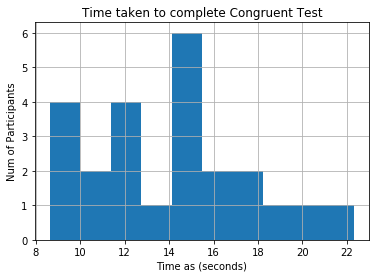

In [90]:
# Build the visualizations here
df['Congruent'].hist()
plt.xlabel('Time as (seconds)')
plt.ylabel('Num of Participants')
plt.title('Time taken to complete Congruent Test');

--write answer here--

The histogram shows that largest number of participants 6 took between 14 and 16 seconds to complete the congruent test. This group is in the middle of the distribution indicating a fairly normally distributed sample.

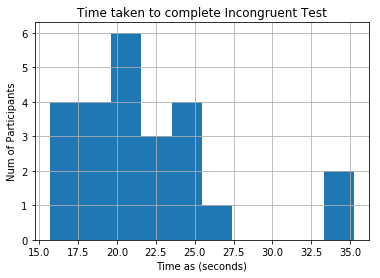

In [91]:
df['Incongruent'].hist()
plt.xlabel('Time as (seconds)')
plt.ylabel('Num of Participants')
plt.title('Time taken to complete Incongruent Test');


The histogram shows that the largest number of participants 6 took around 20 seconds to complete the incongruent test. Two participants took exceptionally long time to complete the test more than 33 seconds. They might be outliers.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [92]:
# Perform the statistical test here
from scipy import stats
sample_size= 23
stats.t.ppf(0.975, sample_size)

# Calculates the T-test on TWO RELATED samples of scores, a and b.
stats.ttest_rel(df['Congruent'], df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

In [93]:
#find t-critical value for 95% confidance interval and 23 degree of freedom for two tailed test

print("t-critical value for two tailed test is: ",round(t.ppf(0.975,23),4))

t-critical value for two tailed test is:  2.0687


In [94]:
#find the diffenence of each data
df['difference'] = df['Congruent'] - df['Incongruent']
df

,Congruent,Incongruent,difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134
5,12.238,20.878,-8.640
6,14.692,24.572,-9.880
7,8.987,17.394,-8.407
8,9.401,20.762,-11.361
9,14.480,26.282,-11.802


In [97]:
print("standard deviation for congruent {0:.4f}".format(df['difference'].std(axis=0)))

standard deviation for congruent 4.8648


-For two tailed t-test at 95% confidence level

-Sample size(n) = 24

-Degree Of Freedom(df) = 23

-t - critical ( tcritical) = ∓2.069

-Standerd Deviation(SD) = 4.8648

-Mean of difference data (x̄) = -7.9648

-Confidance Interval(CI) at 95% level = (-10.019028, -5.910555)

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--

t-statistic (8.02) is greater than the critical value (2.069),So we can reject the null hypothesis.
Which matches up with what we expected, That it takes much less time to do the congruent task than it does to do the incongruent task.

### References
http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/